In [1]:
import pandas as pd
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## Checagem preliminar dos dados

In [2]:
df = pd.read_csv("..\data\external\items_titles_test.csv")

In [3]:
df.head()

,ITE_ITEM_TITLE
0,Tênis Olympikus Esporte Valente - Masculino Kids
1,Bicicleta Barra Forte Samy C/ 6 Marchas Cubo C...
2,Tênis Usthemp Slip-on Temático - Labrador 2
3,Tênis Casual Feminino Moleca Tecido Tie Dye
4,Tênis Star Baby Sapatinho Conforto + Brinde


In [4]:
print(f"Os dados brutos são compostos por {df.shape[1]} features (colunas) e {df.shape[0]} amostras (linhas)")

Os dados brutos são compostos por 1 features (colunas) e 10000 amostras (linhas)


## Verificação gráfica de dados faltantes

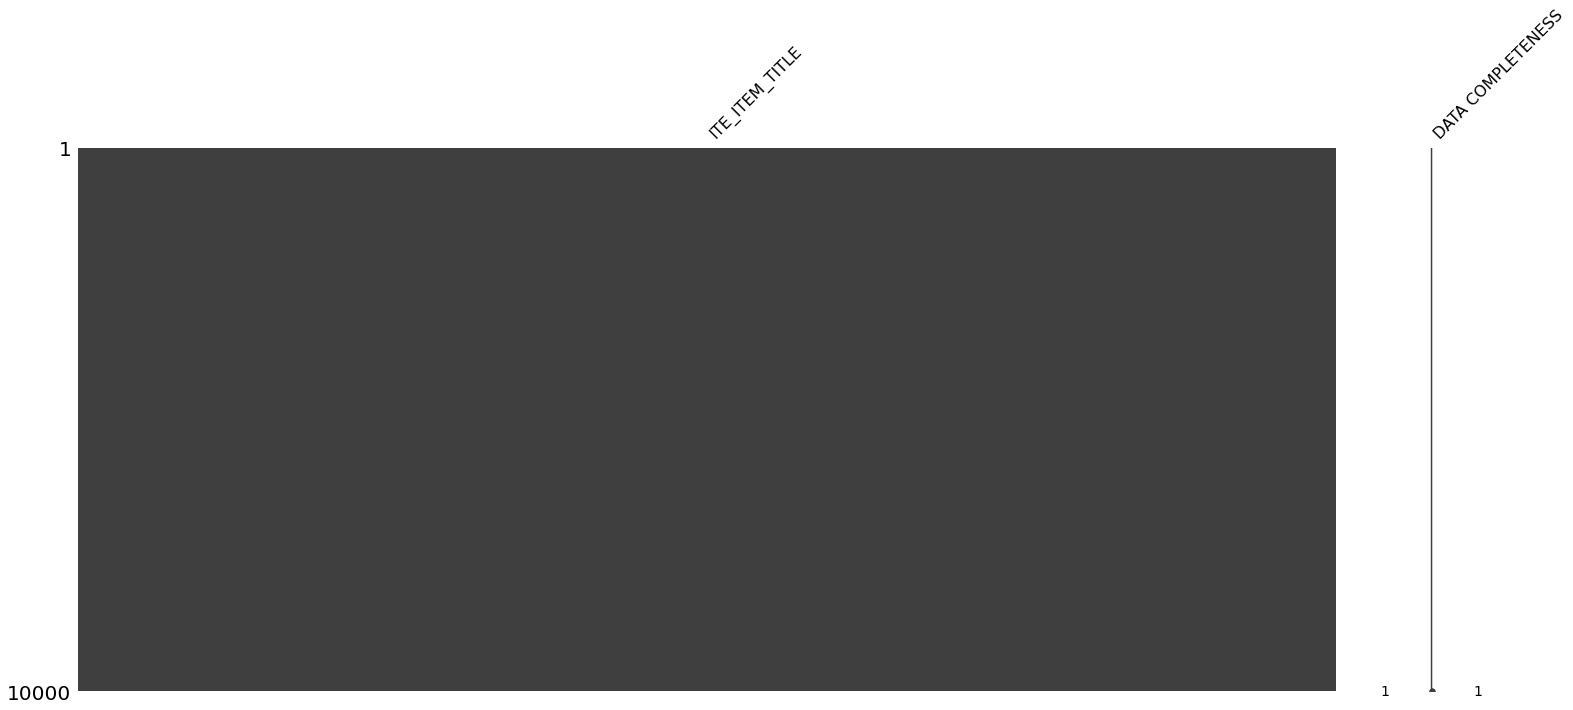

In [5]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

### Estrutura dos dados

## Verificação gráfica da dispersão dos valores das features numéricas

````python
lw=0: lw stands for line width. 0 means that we don’t want to show any lines
marker=".": Instead of lines, we tell the plot to use . as markers for each data point
subplots=True: subplots tells pandas to plot each feature in a separate subplot
layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.
````

Cada ponto nesta figura é uma amostra (ou seja, uma linha) em nosso conjunto de dados e cada subplot representa um feature (coluns) diferente. O eixo y mostra o valor da feature, enquanto o eixo x é o índice de amostra.

In [6]:
df.describe()

,ITE_ITEM_TITLE
count,10000
unique,10000
top,Tênis Olympikus Esporte Valente - Masculino Kids
freq,1


## Inspesção do tipo dos dados

In [7]:
# Importando as funções próprias de análise
from summary import print_type_info

In [8]:
df_info = print_type_info(df)
df_info

,Coluna,Type,Type_Count,Null_Count,None_Count,Unique_Valor
0,ITE_ITEM_TITLE,object,10000,0,0,"[Tênis Olympikus Esporte Valente - Masculino Kids, Bicicleta Barra Forte Sam..."


## Quais dados fazem sentido para a análise?

### Fetures a serem __descartas__ do DataFrame base para as análises
- __OFFER_TYPE__: possui apenas 1 valor único. Por isso essa feature pode ser excluída do dataframe para análise, pois já sabemos que vamos analisar apenas um tipo de oferta.
- __ORIGIN__: possui 2 valores únicos. Mas um deles é __nan__. Ou seja essa feature podemos optar por excluir do dataframe de análise. Vamos supor que a origem é única na falta de informações adicionais.
- __SHIPPING_PAYMENT_TYPE__: possui 2 valores únicos. Mas um deles é __none__. Ou seja essa feature podemos optar por excluir do dataframe de análise. Vamos supor que a forma de pagamento da remessa é única na falta de informações adicionais.


In [9]:
df.head(10)

,ITE_ITEM_TITLE
0,Tênis Olympikus Esporte Valente - Masculino Kids
1,Bicicleta Barra Forte Samy C/ 6 Marchas Cubo C/ Rolamento
2,Tênis Usthemp Slip-on Temático - Labrador 2
3,Tênis Casual Feminino Moleca Tecido Tie Dye
4,Tênis Star Baby Sapatinho Conforto + Brinde
5,Tênis Oakley Frequency 3.0 Preto/marrom
6,Tênis Jogging Feminino Premium Super Lançamento Vizzano
7,Under Armour Hovr Phantom 2 Conexão Bluetooth Tênis Running
8,Tenis Infantil Feminino Menina Criança Moça
9,Tênis Labellamafia Saturn 6 Cores Disponíveis


In [10]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     DL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [12]:
import string
punctuation_list = []
for punctuation in string.punctuation:
    punctuation_list.append(punctuation)

In [13]:
print(f"Pontuação: {punctuation_list}")

Pontuação: ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [14]:
sentences = list(df["ITE_ITEM_TITLE"])
sentences[:5]

['Tênis Olympikus Esporte Valente - Masculino Kids',
 'Bicicleta Barra Forte Samy C/ 6 Marchas Cubo C/ Rolamento',
 'Tênis Usthemp Slip-on Temá\x81tico - Labrador 2',
 'Tênis Casual Feminino Moleca Tecido Tie Dye',
 'Tênis Star Baby Sapatinho Conforto + Brinde']

In [15]:
def clean_string(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

In [16]:
cleaned = list(map(clean_string, sentences))
cleaned[:5]

['tênis olympikus esporte valente masculino kids',
 'bicicleta barra forte samy c 6 marchas cubo c rolamento',
 'tênis usthemp slipon temá\x81tico labrador 2',
 'tênis casual feminino moleca tecido tie dye',
 'tênis star baby sapatinho conforto brinde']

In [17]:
vectorizer = CountVectorizer().fit_transform(cleaned)
vectors = vectorizer.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
csim = cosine_similarity(vectors)
csim

array([[1.        , 0.        , 0.16666667, ..., 0.16666667, 0.14433757,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 1.        , ..., 0.16666667, 0.14433757,
        0.13608276],
       ...,
       [0.16666667, 0.        , 0.16666667, ..., 1.        , 0.28867513,
        0.13608276],
       [0.14433757, 0.        , 0.14433757, ..., 0.28867513, 1.        ,
        0.11785113],
       [0.27216553, 0.        , 0.13608276, ..., 0.13608276, 0.11785113,
        1.        ]])

In [19]:
def cosine_sim_vectors(vec1, vec2):
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

In [20]:
cosine_sim_vectors(vectors[0], vectors[1])  > 0.5

False

In [21]:
df = df[0:1000]

In [22]:
list_of_similarity = []
count = 0
for index1, product1 in enumerate(df["ITE_ITEM_TITLE"]):
    for index2, product2 in enumerate(df["ITE_ITEM_TITLE"]):
        if cosine_sim_vectors(vectors[index1], vectors[index2]) > 0.5:
            list_of_similarity.append([product1, product2, cosine_sim_vectors(vectors[index1], vectors[index2])])
            if count % 1000:
                print([product1, product2, cosine_sim_vectors(vectors[index1], vectors[index2])])


In [23]:
len(list_of_similarity)

4580

### __Lista de comparação dos primeros 1000 producos testados que criou uma lista de 4580 pares com simalaridade coseno > 0.5__

In [25]:
pd.DataFrame(list_of_similarity)

,0,1,2
0,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus Esporte Valente - Masculino Kids,1.000000
1,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Masculino Sport Academia/caminhada Esporte Azul,0.500000
2,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus - Masculino Triunfo 835,0.547723
3,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus Feminino Cyber 2 Esporte,0.547723
4,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Masculino Olympikus Enjoy Kids/726 - Infantil,0.500000
5,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Masculino Olympikus Cristal Marinho,0.547723
6,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus Perfect 2 Masculino - Original C/ Nf,0.500000
7,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus Caminhada Wellness - Masculino - Preto,0.500000
8,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Olympikus Masculino Master 4 - Marinho E Azul,0.500000
9,Tênis Olympikus Esporte Valente - Masculino Kids,Tênis Infantil Masculino Kids E Baby M1230,0.500000
